In [27]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [28]:
final_df = pd.merge(city_data, ride_data, on="city", how='left')
final_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [29]:
total = final_df.groupby('city')['fare'].sum().to_frame()

avg = final_df.groupby('city')['fare'].mean().to_frame()

rides = final_df.groupby('city')['ride_id'].count().to_frame()

driver_count = final_df.groupby('city')['driver_count'].unique().to_frame()
driver_count['driver_count'] = driver_count['driver_count'].str.get(0)

city_type = final_df.groupby('city')['type'].unique().to_frame()
city_type['type'] = city_type['type'].str.get(0)


In [30]:
avg.columns=["city"]
one = avg.join(rides, how="left")
one.columns=["Average Fare", "Total Rides"]

two = one.join(total, how="inner")
two.columns=["Average Fare", "Total Rides", "City Fare Total"]

three = two.join(driver_count, how="inner")
three.columns=["Average Fare", "Total Rides", "City Fare Total", "Driver Count"]

complete = three.join(city_type, how='inner')
complete.columns=["Average Fare", "Total Rides", "City Fare Total", "Driver Count", "City Type"]
complete.head()

,Average Fare,Total Rides,City Fare Total,Driver Count,City Type
city,,,,,
Amandaburgh,24.641667,18,443.55,12,Urban
Barajasview,25.332273,22,557.31,26,Urban
Barronchester,36.422500,16,582.76,11,Suburban
Bethanyland,32.956111,18,593.21,22,Suburban
Bradshawfurt,40.064000,10,400.64,7,Rural


In [31]:
urban_data = complete.loc[(complete['City Type']=='Urban'), :]
suburban_data = complete.loc[(complete['City Type']=='Suburban'), :]
rural_data = complete.loc[(complete['City Type']=='Rural'), :]

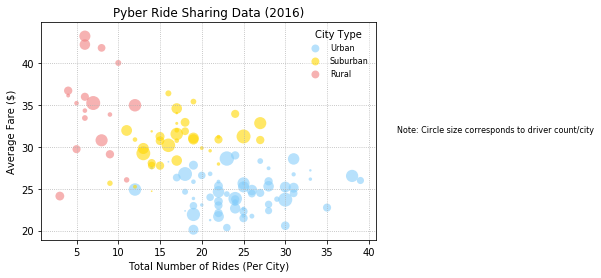

In [32]:
urban_rides = urban_data.groupby('city')['Total Rides'].sum()
avg_urban_fare = urban_data.groupby('city')['Average Fare'].mean()
suburban_rides = suburban_data.groupby('city')['Total Rides'].sum()
avg_suburban_fare = suburban_data.groupby('city')['Average Fare'].mean()
rural_rides = rural_data.groupby('city')['Total Rides'].sum()
avg_rural_fare = rural_data.groupby('city')['Average Fare'].mean()
driver_count = np.array(driver_count)
driver_count = driver_count * 3


textstr = 'Note: Circle size corresponds to driver count/city'

urban = plt.scatter(urban_rides, avg_urban_fare, s=driver_count, color='lightskyblue', alpha=0.6, edgecolors='none')
suburban = plt.scatter(suburban_rides, avg_suburban_fare, s=driver_count, color='gold', alpha=0.6, edgecolors='none')
rural = plt.scatter(rural_rides, avg_rural_fare, s=driver_count, color='lightcoral', alpha=0.6, edgecolors='none')

plt.grid(linestyle='dotted')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.gcf().text(0.95, 0.50, textstr, fontsize=8)
plt.legend((urban, suburban, rural),('Urban', 'Suburban', 'Rural'),scatterpoints=1,loc='upper right',ncol=1,\
           fontsize=8, markerscale=0.75,title='City Type', edgecolor='none',framealpha=0.25)

plt.show()

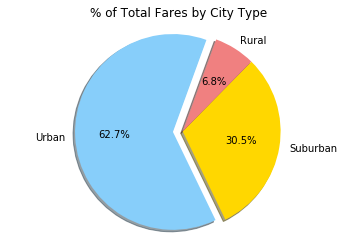

In [33]:
urban_final = urban_data['City Fare Total'].sum()
suburban_final = suburban_data['City Fare Total'].sum()
rural_final = rural_data['City Fare Total'].sum()



driver_type = ["Urban", "Suburban", "Rural"]
driver_count = [urban_final, suburban_final, rural_final]
colors = ["lightskyblue", "gold","lightcoral"]
explode = (0.1,0,0)
plt.pie(driver_count, explode=explode, labels=driver_type, colors=colors,
       	autopct="%1.1f%%", shadow=True, startangle=70)
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.show()


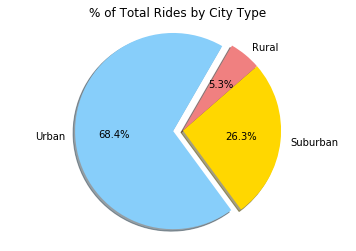

In [21]:
urban_final = urban_data['Total Rides'].sum()
suburban_final = suburban_data['Total Rides'].sum()
rural_final = rural_data['Total Rides'].sum()


# Create a Pie Chart to Express the Above Date
ride_type = ["Urban", "Suburban", "Rural"]
ride_count = [urban_final, suburban_final, rural_final]
colors = ["lightskyblue", "gold","lightcoral"]
explode = (0.1,0,0)
plt.pie(ride_count, explode=explode, labels=ride_type, colors=colors,
       	autopct="%1.1f%%", shadow=True, startangle=60)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.show()

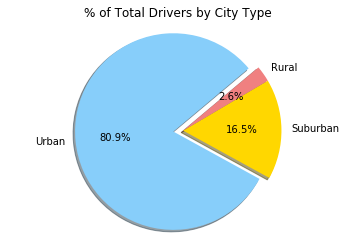

In [22]:
urban_driver_count = urban_data['Driver Count'].sum()
suburban_driver_count = suburban_data['Driver Count'].sum()
rural_driver_count = rural_data['Driver Count'].sum()


# Create a Pie Chart to Express the Above Date
driver_type = ["Urban", "Suburban", "Rural"]
driver_count = [urban_driver_count, suburban_driver_count, rural_driver_count]
colors = ["lightskyblue", "gold","lightcoral"]
explode = (0.1,0,0)
plt.pie(driver_count, explode=explode, labels=driver_type, colors=colors,
       	autopct="%1.1f%%", shadow=True, startangle=40)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.show()

One trend is that urban areas comprised the largest share of drivers, fares, and rides. Another was that rural areas had the highest average fares despite having the lowest number of fares. A third trend was that urban drivers gave a disproportionate amount of rides (about 68%) ompared to the amount of money they made (about 63%). 